2.Simulating your income

(a)

In [11]:
# Import initial packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from scipy.stats import normaltest 

In [12]:
# Creating dictionary of parameters
'''
p = {
    'inc0'         : 80000,        #starting income
    'sigma'        : 0.13,         #sd of normal distributed error term
    'rho'           : 0.4,          #persistence
    'g'            : 0.025,        #growth rate
    'n_years'      : 40,           #years to work
    'base_year'    : int(2020),    #starting year
    'no_sim'       : 10000         #number of simulations
}
'''

def income_gr(p):
    '''
    define a function that take in parameters from the dictionary p 
    and returns a matrix of income
    ''' 
    
    #set random seed
    np.random.seed(524)

    log_errors = np.random.normal(0, p['sigma'], (p['n_years'], p['no_sim']))

    #create a matrix of dim (n_years, no_sim)
    log_income = np.zeros((p['n_years'], p['no_sim']))

    #fill the matrix
    log_income[0, :] = np.log(p['inc0']) + log_errors[0, :]

    #loop and apply model
    for yr in range(1, p['n_years']):
        log_income[yr, :] = ((1 - p['rho']) *(np.log(p['inc0']) + p['g'] * (yr))
                            + p['rho'] * (log_income[yr-1,:]) 
                            + log_errors[yr, :])


    income = np.exp(log_income)
    return income

In [13]:
# Input parameters and generate the matrix
para = {
    'inc0'         : 80000,        #starting income
    'sigma'        : 0.13,         #sd of normal distributed error term
    'rho'          : 0.4,          #persistence
    'g'            : 0.025,        #growth rate
    'n_years'      : 40,           #years to work
    'base_year'    : int(2020),    #starting year
    'no_sim'       : 10000         #number of simulations
}

income_mat = income_gr(para)

Text(0,0.5,'Annual wealth (\\$s)')

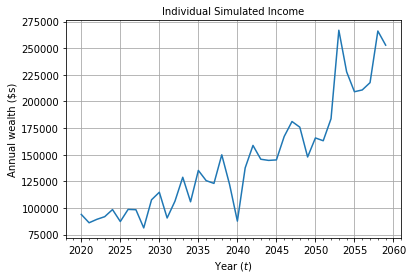

In [14]:
%matplotlib inline
p = para
year_vec = np.arange(p['base_year'], p['base_year'] + p['n_years'])
individual = 500
fig, ax = plt.subplots()
plt.plot(year_vec, income_mat[:, individual])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Individual Simulated Income', fontsize=10)
plt.xlabel(r'Year ($t$)')
plt.ylabel(r'Annual wealth (\$s)')

(b) 4% of the class will earn more than 100,000, and 15% of the class will earn less than 70,000.

Text(0.5,1,'Histogram of Initial Income for 50-bin Simulations')

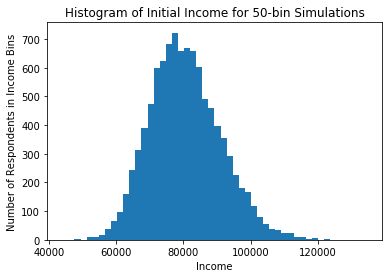

In [15]:
#Plot histograms for bins = 50
plt.hist(income_mat[0,:], bins = 50)
plt.xlabel("Income")
plt.ylabel("Number of Respondents in Income Bins")
plt.title("Histogram of Initial Income for 50-bin Simulations")

In [16]:
#calculate the percentages
income0 = np.ndarray.tolist(income_mat[0,:])
print(len([i for i in income0 if i > 100000]) / len(income0))
print(len([i for i in income0 if i < 70000]) / len(income0))

0.0417
0.1512


In [17]:
#testing normality
stat,p = normaltest(income_mat[0,:])
print(stat,p)
print(np.mean(income_mat[0,:]))
print(np.median(income_mat[0,:]))

290.481782626689 8.369169350300544e-64
80653.27431763953
79865.11458578068


According to observation and the test performed, the distribution is normally distributed. But because the median of this distribution is less than the mean, I would say that the distribution is slightly right skewed. 

(c) Only in about 16.78% of the simulations that I will be able to pay off the loan in 10 years. 

0.1678


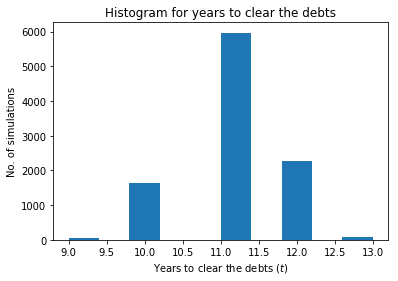

In [18]:
def years_to_pay_off(mat):
    '''
    Define a function that will return a histogram and a percentage for both question (c) and (d)
    '''

    #create a payment matrix
    pay_mat = mat * 0.1
    pay_yr = []
    
    for i in range(len(pay_mat[0,:])):
        yr = 1
        while sum(pay_mat[:,i][:yr]) < 95000:
            yr += 1
            if sum(pay_mat[:,i][:yr]) >= 95000:
                pay_yr.append(int(yr)) 
                #pay_yr returns a list with 10,000 entries of the years needed to clear the debts
                break
                
    # plot the histogram
    plt.hist(pay_yr)
    plt.xlabel("Years to clear the debts ($t$)")
    plt.ylabel("No. of simulations")
    plt.title("Histogram for years to clear the debts")
    
    #calculating percentage
    print(len([i for i in pay_yr if i <= 10])/len(pay_yr))

years_to_pay_off(income_mat)

(d) In this case, the parameters that I would use for my simulations would change to:

0.7602


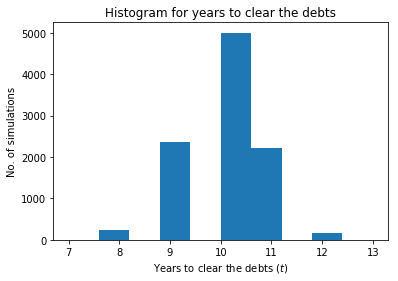

In [19]:
#new dictionary with new parameters
para_new = {
    'inc0'         : 90000,        #starting income
    'sigma'        : 0.17,         #sd of normal distributed error term
    'rho'          : 0.4,          #persistence
    'g'            : 0.025,        #growth rate
    'n_years'      : 40,           #years to work
    'base_year'    : int(2020),    #starting year
    'no_sim'       : 10000         #number of simulations
}

#calling functions defined in previous questions
income_mat_new = income_gr(para_new)
years_to_pay_off(income_mat_new)

In this case, 76% of the simulations would be able to pay off the loan in 10 years. 